In [20]:
#F3 : Shifted_Rosenbrock_F3_Dim50

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pygmo as pg
import time

In [2]:
#set desktop or system path
import sys
sys.path.append('C:\\DCHAVAN\\DSTI-Masters\\Curriculum\\2020\\Metaheuristics\\Assignment\\Project\\DataF1F6')

In [3]:
dataf3 = pd.read_csv("f3.csv")
rosenb_data = dataf3["f3data"].tolist()
dataf3.head(10)

,f3data
0,-89.929761
1,-89.926065
2,-89.607925
3,-89.392453
4,-89.387110
5,-89.348058
6,-89.300902
7,-89.239553
8,-89.149859
9,-88.349123


In [4]:
# Function parameters
D = 500
bias = 390
popsize = 200
lower_bound = -100
upper_bound = 100

In [5]:
# Shifted_Rosenbrock function with the parameters
def function(x, data, dim=D, f_bias):
    F = 0
    z = np.empty(dim)
    for i in range(dim - 1):
        z[i] = x[i] - data[i] + 1
    for i in range (dim - 2):
        F += 100 * ((z[i]**2 - z[i + 1])**2) + (z[i] - 1)**2
    fc = F + f_bias
    return fc

In [6]:
class rosenbrock1:
    def __init__(self, dim, lower_bound, upper_bound, minim, bias):
        self.dim = dim
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.minim = minim
        self.bias = bias

    def fitness(self, x):
        res = [function(x, self.minim, self.dim, self.bias)]
        return res

    def get_bounds(self):
        xmin = self.lower_bound * np.ones(self.dim)
        xmax = self.upper_bound * np.ones(self.dim)
        return xmin, xmax

In [7]:
def solver(dimension, lower_bound, upper_bound, minim, bias, popsize):
    global algo
    global pop
    global niter
    global log
    global curve
    gen=2500
    prob = pg.problem(rosenbrock1(dimension, lower_bound, upper_bound, minim, bias))
    algo = pg.algorithm(pg.de(F=0.85, gen=gen, CR=0.9, variant=3, ftol=1e-05, xtol=1e-05))
    algo.set_verbosity(1)
    pop = pg.population(prob, popsize)
    pop = algo.evolve(pop)
    log = algo.extract(pg.de).get_log()
    curve = [x[2] for x in log]
    niter = log[-1][0]
    return prob, algo, pop, log, niter, curve

In [8]:
def plot_fitness(solution):
    fig = plt.figure(figsize=(16, 13))
    plt.plot(solution)

In [9]:
plt.show()

In [10]:
# Solve the problem
solver(D, lower_bound, upper_bound, rosenb_data, bias, popsize)

(Problem name: <class '__main__.rosenbrock1'>
 	C++ class name: class pybind11::object
 
 	Global dimension:			500
 	Integer dimension:			0
 	Fitness dimension:			1
 	Number of objectives:			1
 	Equality constraints dimension:		0
 	Inequality constraints dimension:	0
 	Lower bounds: [-100, -100, -100, -100, -100, ... ]
 	Upper bounds: [100, 100, 100, 100, 100, ... ]
 	Has batch fitness evaluation: false
 
 	Has gradient: false
 	User implemented gradient sparsity: false
 	Has hessians: false
 	User implemented hessians sparsity: false
 
 	Fitness evaluations: 0
 
 	Thread safety: none, Algorithm name: DE: Differential Evolution [stochastic]
 	C++ class name: class pagmo::de
 
 	Thread safety: basic
 
 Extra info:
 	Generations: 2500
 	Parameter F: 0.850000
 	Parameter CR: 0.900000
 	Variant: 3
 	Stopping xtol: 0.000010
 	Stopping ftol: 0.000010
 	Verbosity: 1
 	Seed: 2128736019, Problem name: <class '__main__.rosenbrock1'>
 	C++ class name: class pybind11::object
 
 	Global dimension:	

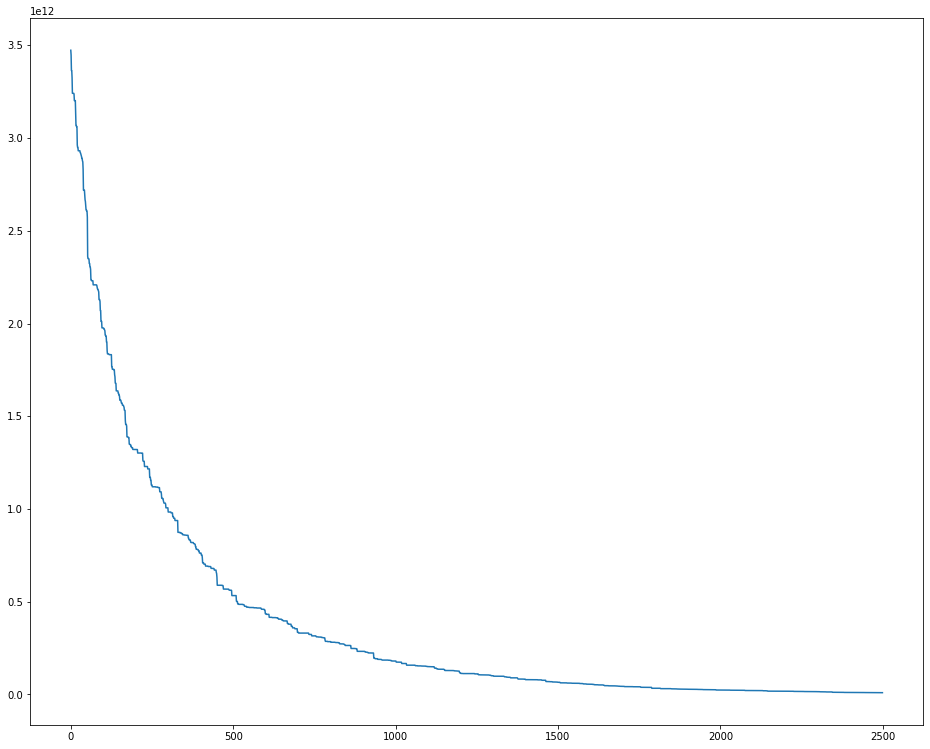

In [15]:
plot_fitness(curve)

In [16]:
f3_sol = pd.DataFrame(pop.champion_x, columns=[''])
f3_sol.to_csv("f3_rosenbrk500.csv", sep=",")